In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [209]:
df=pd.read_csv('house_price_bd.csv')

In [210]:
df['City'].value_counts()

City
dhaka               1650
chattogram          1470
narayanganj-city     420
gazipur              180
cumilla              145
Name: count, dtype: int64

In [211]:
df.isnull().sum()

Title                  0
Bedrooms            1001
Bathrooms           1001
Floor_no             684
Occupancy_status      99
Floor_area            99
City                   0
Price_in_taka          0
Location               6
dtype: int64

In [212]:
df.isnull().sum()

Title                  0
Bedrooms            1001
Bathrooms           1001
Floor_no             684
Occupancy_status      99
Floor_area            99
City                   0
Price_in_taka          0
Location               6
dtype: int64

In [213]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

PermissionError: [WinError 5] Access is denied

In [214]:
ProfileReport(df,title='report').to_file('output.html')

NameError: name 'ProfileReport' is not defined

In [215]:
df['Price_in_taka']=df['Price_in_taka'].str.replace('৳','')

In [216]:
df['Price_in_taka']=df['Price_in_taka'].str.replace(',','')

In [217]:
df['Price_in_taka']=df['Price_in_taka'].astype(float)

In [218]:
df.head()

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3,vacant,1960.0,dhaka,39000000.0,"Gulshan 1, Gulshan"
1,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1,vacant,1705.0,dhaka,16900000.0,"Lake Circus Road, Kalabagan"
2,1370 square feet apartment is ready to sale in...,3.0,3.0,6,vacant,1370.0,dhaka,12500000.0,"Shukrabad, Dhanmondi"
3,2125 Square Feet Apartment For Sale In Bashund...,3.0,3.0,4,vacant,2125.0,dhaka,20000000.0,"Block L, Bashundhara R-A"
4,Buy This 2687 Square Feet Flat In The Nice Are...,3.0,3.0,4,vacant,2687.0,dhaka,47500000.0,"Road No 25, Banani"


In [219]:
# Group by 'Floor_no' and calculate the mean of 'Price_in_taka'
grouped2 = df.groupby('Floor_no')['Price_in_taka'].mean()

# Print the result
print(grouped2)

Floor_no
0+7                     1.050000e+08
1                       1.130754e+07
10                      2.842885e+07
11                      2.332713e+07
12                      2.068089e+07
13                      1.072762e+07
14                      1.606250e+07
17                      8.822000e+06
18                      2.993200e+07
1F                      6.500000e+06
1st                     2.900000e+07
2                       1.051656e+07
3                       1.229689e+07
4                       1.230923e+07
4th to 8th Backside     3.800000e+06
5                       1.018031e+07
5th                     5.000000e+06
6                       1.091768e+07
7                       1.192081e+07
8                       1.043100e+07
8th                     4.700000e+06
9                       1.283691e+07
A1,A2,A3,A4,A5,A6,A7    1.050000e+08
G+7                     7.500000e+07
Merin City - Purbach    4.575000e+06
Name: Price_in_taka, dtype: float64


In [220]:
grouped = df.groupby('Bedrooms')['Bathrooms'].mean()
print(grouped)


Bedrooms
1.0      1.000000
2.0      1.982759
3.0      2.964856
4.0      4.113636
5.0      4.800000
6.0      5.333333
7.0      8.000000
8.0      4.500000
13.0    10.000000
15.0    10.000000
16.0    10.000000
18.0    10.000000
20.0    10.000000
21.0    10.000000
22.0    10.000000
23.0    10.000000
27.0    10.000000
33.0    10.000000
46.0    10.000000
50.0    10.000000
Name: Bathrooms, dtype: float64


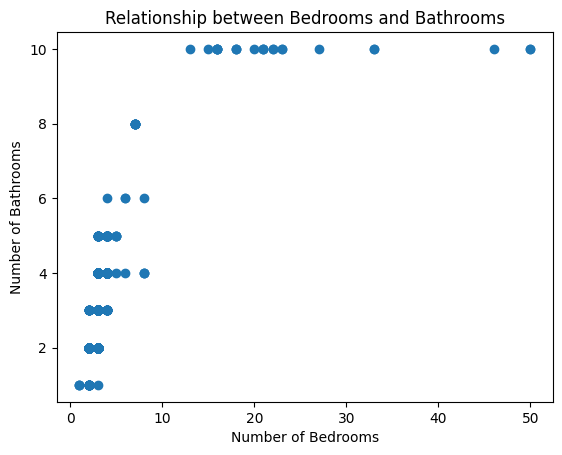

In [221]:
import matplotlib.pyplot as plt

plt.scatter(df['Bedrooms'], df['Bathrooms'])
plt.title('Relationship between Bedrooms and Bathrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Bathrooms')
plt.show()


In [222]:
df.isnull().sum()

Title                  0
Bedrooms            1001
Bathrooms           1001
Floor_no             684
Occupancy_status      99
Floor_area            99
City                   0
Price_in_taka          0
Location               6
dtype: int64

In [223]:
# Fill missing 'Bedrooms' using the group mean of 'Bathrooms'
df['Bedrooms'] = df['Bedrooms'].fillna(df.groupby('Bathrooms')['Bedrooms'].transform('mean'))

# Fill remaining 'Bedrooms' with the overall mean or median if still null
df['Bedrooms'] = df['Bedrooms'].fillna(df['Bedrooms'].mean())  # or use median: df['Bedrooms'].median()

# Fill missing 'Bathrooms' using the group mean of 'Bedrooms'
df['Bathrooms'] = df['Bathrooms'].fillna(df.groupby('Bedrooms')['Bathrooms'].transform('mean'))

# Fill remaining 'Bathrooms' with the overall mean or median if still null
df['Bathrooms'] = df['Bathrooms'].fillna(df['Bathrooms'].mean())  # or use median: df['Bathrooms'].median()


In [224]:
df.isnull().sum()

Title                 0
Bedrooms              0
Bathrooms             0
Floor_no            684
Occupancy_status     99
Floor_area           99
City                  0
Price_in_taka         0
Location              6
dtype: int64

In [225]:
df['Floor_no'].value_counts()

Floor_no
1                       532
4                       418
5                       402
2                       397
3                       366
6                       316
7                       252
8                       228
9                       167
10                       30
11                       26
12                       19
13                        8
Merin City - Purbach      6
8th                       2
4th to 8th Backside       2
14                        2
1st                       1
G+7                       1
0+7                       1
A1,A2,A3,A4,A5,A6,A7      1
1F                        1
18                        1
5th                       1
17                        1
Name: count, dtype: int64

In [226]:
# Define a list of unwanted Floor_no values
unwanted_floor_no = [
    '4th to 8th Backside',
    'Merin City - Purbach',
    'A1,A2,A3,A4,A5,A6,A7',
    '1st',
    '0+7',
    '5th',
    '8th',
    '1F',
    'G+7',
    '17'
]

# Use isin to filter out these values and drop the corresponding rows
df = df[~df['Floor_no'].isin(unwanted_floor_no)]


In [227]:
df.isnull().sum()

Title                 0
Bedrooms              0
Bathrooms             0
Floor_no            684
Occupancy_status     99
Floor_area           99
City                  0
Price_in_taka         0
Location              6
dtype: int64

In [228]:
df['Location'].dropna

<bound method Series.dropna of 0                     Gulshan 1, Gulshan
1            Lake Circus Road, Kalabagan
2                   Shukrabad, Dhanmondi
3               Block L, Bashundhara R-A
4                     Road No 25, Banani
                      ...               
3860    Joydebpur, Gazipur Sadar Upazila
3861     Chandana, Gazipur Sadar Upazila
3862    Joydebpur, Gazipur Sadar Upazila
3863    Joydebpur, Gazipur Sadar Upazila
3864    Joydebpur, Gazipur Sadar Upazila
Name: Location, Length: 3848, dtype: object>

In [229]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Create a copy of your DataFrame to avoid modifying the original one
df_copy = df.copy()

# Separate the rows where 'Floor_no' is null and not null
df_not_null = df_copy[df_copy['Floor_no'].notnull()]
df_null = df_copy[df_copy['Floor_no'].isnull()]

# Independent variable (X) is 'Bedrooms', and dependent variable (y) is 'Floor_no'
X_train = df_not_null[['Bedrooms']]
y_train = df_not_null['Floor_no']

# Initialize the linear regression model and fit it on the non-null data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the missing values for 'Floor_no' based on 'Bedrooms'
df_null['Floor_no'] = model.predict(df_null[['Bedrooms']])

# Fill the missing values in the original dataframe
df_copy.loc[df_copy['Floor_no'].isnull(), 'Floor_no'] = df_null['Floor_no']

# Now df_copy contains the filled values for 'Floor_no'


C:\Windows\Temp\ipykernel_5220\3570340368.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null['Floor_no'] = model.predict(df_null[['Bedrooms']])


In [230]:
df_copy.isnull().sum()

Title                0
Bedrooms             0
Bathrooms            0
Floor_no             0
Occupancy_status    99
Floor_area          99
City                 0
Price_in_taka        0
Location             6
dtype: int64

In [231]:
df_copy.isnull().sum()

Title                0
Bedrooms             0
Bathrooms            0
Floor_no             0
Occupancy_status    99
Floor_area          99
City                 0
Price_in_taka        0
Location             6
dtype: int64

In [232]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Step 1: Separate the rows where 'Floor_area' is null and not null in df_copy
non_null = df_copy[df_copy['Floor_area'].notnull()]
null_rows = df_copy[df_copy['Floor_area'].isnull()]

# Step 2: Independent variable (X) is 'Bedrooms', and dependent variable (y) is 'Floor_area'
X = non_null[['Bedrooms']]
y = non_null['Floor_area']

# Step 3: Initialize the linear regression model and fit it on the non-null data from df_copy
model = LinearRegression()
model.fit(X, y)

# Step 4: Predict the missing values for 'Floor_area' in df_copy based on 'Bedrooms'
predicted_values = model.predict(null_rows[['Bedrooms']])

# Step 5: Fill the missing values in a new DataFrame 'new_df'
new_df = df_copy.copy()
new_df.loc[new_df['Floor_area'].isnull(), 'Floor_area'] = predicted_values

# Now 'new_df' contains the filled values for 'Floor_area'


In [233]:
new_df.isnull().sum()

Title                0
Bedrooms             0
Bathrooms            0
Floor_no             0
Occupancy_status    99
Floor_area           0
City                 0
Price_in_taka        0
Location             6
dtype: int64

In [234]:
new_df=new_df.drop(['Title','Occupancy_status'],axis=1)

In [235]:
new_df.head()

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka,Location
0,3.0,4.0,3,1960.0,dhaka,39000000.0,"Gulshan 1, Gulshan"
1,3.0,3.0,1,1705.0,dhaka,16900000.0,"Lake Circus Road, Kalabagan"
2,3.0,3.0,6,1370.0,dhaka,12500000.0,"Shukrabad, Dhanmondi"
3,3.0,3.0,4,2125.0,dhaka,20000000.0,"Block L, Bashundhara R-A"
4,3.0,3.0,4,2687.0,dhaka,47500000.0,"Road No 25, Banani"


In [236]:
# Extract the part of 'Location' after the last comma
new_df['Location'] = new_df['Location'].str.rsplit(',', n=1).str.get(-1).str.strip()

# Now 'new_df['Location']' contains only the part after the last comma


In [237]:
new_df.head()

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka,Location
0,3.0,4.0,3,1960.0,dhaka,39000000.0,Gulshan
1,3.0,3.0,1,1705.0,dhaka,16900000.0,Kalabagan
2,3.0,3.0,6,1370.0,dhaka,12500000.0,Dhanmondi
3,3.0,3.0,4,2125.0,dhaka,20000000.0,Bashundhara R-A
4,3.0,3.0,4,2687.0,dhaka,47500000.0,Banani


In [238]:
new_df['Location'].unique()

array(['Gulshan', 'Kalabagan', 'Dhanmondi', 'Bashundhara R-A', 'Banani',
       'Badda', 'Demra', 'Aftab Nagar', 'Shyampur', 'Uttara',
       'Kathalbagan', 'Adabor', 'Mirpur', 'Mohammadpur', 'Niketan',
       'Shantinagar', 'Sutrapur', 'Dakshin Khan', 'Agargaon',
       'Keraniganj', 'Rampura', 'Ibrahimpur', 'Mohakhali', 'Lalmatia',
       'Khilgaon', 'Tejgaon', 'Maghbazar', 'Banasree', 'Savar',
       'Malibagh', 'Cantonment', 'Shiddheswari', 'Motijheel', 'Bashabo',
       'Banani DOHS', 'Hazaribag', 'Eskaton', 'Hatirpool', 'Nikunja',
       'Dumni', nan, 'Kafrul', 'Joar Sahara', 'Nadda', 'Khilkhet',
       'North Shahjahanpur', 'Shyamoli', 'Turag', 'Baridhara',
       'Purbachal', 'Mugdapara', 'Shegunbagicha', 'Kachukhet', 'Kuril',
       'Uttar Khan', 'Banglamotors', 'Lalbagh', 'Bangshal',
       'Shahjahanpur', 'Baridhara DOHS', '4 No Chandgaon Ward',
       '15 No. Bagmoniram Ward', '7 No. West Sholoshohor Ward',
       '9 No. North Pahartali Ward', 'Muradpur', 'Bayazid', 'Khulsh

In [239]:
import pandas as pd
import category_encoders as ce
import pickle


# Initialize the TargetEncoder
target_encoder = ce.TargetEncoder(cols=['Location'])

# Fit the encoder based on 'Location' and 'Price_in_tk'
target_encoder.fit(new_df['Location'], new_df['Price_in_taka'])

# Apply the encoding on the 'Location' column
new_df['Location'] = target_encoder.transform(new_df['Location'])

# Check the output
print("Data after target encoding:")
print(new_df['Location'])


Data after target encoding:
0       8.137458e+07
1       1.409571e+07
2       1.990445e+07
3       2.183746e+07
4       1.856280e+07
            ...     
3860    8.985729e+06
3861    8.985729e+06
3862    8.985729e+06
3863    8.985729e+06
3864    8.985729e+06
Name: Location, Length: 3848, dtype: float64


In [240]:
# Save the encoder to a pickle file
with open('target_encoder.pkl', 'wb') as file:
    pickle.dump(target_encoder, file)


In [259]:
# Load the target encoder from pickle
with open('target_encoder.pkl', 'rb') as file:
    target_encoder = pickle.load(file)

# New data for prediction (replace with actual new data)
new_data = pd.DataFrame({
    'Bedrooms': [2, 3],
    'Bathrooms': [2, 3],
    'Floor_no': [1, 2],
    'Floor_area': [1200, 1500],
    'Location': ['Gulshan', 'Banani'],  # Test locations
    'City_dhaka': [1, 0],
    'City_chattogram': [0, 1]
})

# Apply the saved target encoder to the new data
new_data['Location_encoded'] = target_encoder.transform(new_data['Location'])
new_d=target_encoder.transform("Gulshan")

# Check the transformed data
print("New data after target encoding:")
print(new_d)
print(type(new_data['Location']))

ValueError: Unexpected input type: <class 'str'>

In [ ]:
import json
import pickle
import pandas as pd

# Load the pickle files for Target Encoder and ML model
with open('target_encoder.pkl', 'rb') as te_file:
    target_encoder = pickle.load(te_file)

with open('ml_model.pkl', 'rb') as model_file:
    ml_model = pickle.load(model_file)

# Example JSON input
json_input = '''{
    "City": "narayanganj-city",
    "Location": "Downtown",
    "beds": 3,
    "bath": 2,
    "area": 1500
}'''

# Convert the JSON input to a Python dictionary
input_data = json.loads(json_input)

# Convert the dictionary to a Pandas DataFrame
input_df = pd.DataFrame([input_data])

# Apply the Target Encoder to the 'Location' column (assuming Location needs encoding)
input_df['Location'] = target_encoder.transform(input_df['Location'])

# Pass the transformed input to the machine learning model for prediction
predicted_value = ml_model.predict(input_df)

# Output the prediction
print("Predicted Value:", predicted_value)


In [242]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3848 entries, 0 to 3864
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bedrooms       3848 non-null   float64
 1   Bathrooms      3848 non-null   float64
 2   Floor_no       3848 non-null   object 
 3   Floor_area     3848 non-null   float64
 4   City           3848 non-null   object 
 5   Price_in_taka  3848 non-null   float64
 6   Location       3848 non-null   float64
dtypes: float64(5), object(2)
memory usage: 240.5+ KB


In [243]:
new_df['Floor_no']=new_df['Floor_no'].astype(int)

In [244]:
new_df=pd.get_dummies(new_df,columns=['City'])

In [245]:
new_df.head()

,Bedrooms,Bathrooms,Floor_no,Floor_area,Price_in_taka,Location,City_chattogram,City_cumilla,City_dhaka,City_gazipur,City_narayanganj-city
0,3.0,4.0,3,1960.0,39000000.0,8.137458e+07,False,False,True,False,False
1,3.0,3.0,1,1705.0,16900000.0,1.409571e+07,False,False,True,False,False
2,3.0,3.0,6,1370.0,12500000.0,1.990445e+07,False,False,True,False,False
3,3.0,3.0,4,2125.0,20000000.0,2.183746e+07,False,False,True,False,False
4,3.0,3.0,4,2687.0,47500000.0,1.856280e+07,False,False,True,False,False


In [246]:
new_df.drop('Location_encoded',axis=1,inplace=True)

KeyError: "['Location_encoded'] not found in axis"

In [247]:
new_df=1*new_df

In [248]:
new_df.head()

,Bedrooms,Bathrooms,Floor_no,Floor_area,Price_in_taka,Location,City_chattogram,City_cumilla,City_dhaka,City_gazipur,City_narayanganj-city
0,3.0,4.0,3,1960.0,39000000.0,8.137458e+07,0,0,1,0,0
1,3.0,3.0,1,1705.0,16900000.0,1.409571e+07,0,0,1,0,0
2,3.0,3.0,6,1370.0,12500000.0,1.990445e+07,0,0,1,0,0
3,3.0,3.0,4,2125.0,20000000.0,2.183746e+07,0,0,1,0,0
4,3.0,3.0,4,2687.0,47500000.0,1.856280e+07,0,0,1,0,0


In [249]:
X=new_df.drop('Price_in_taka',axis=1)
y=new_df['Price_in_taka']

In [260]:
X

,Bedrooms,Bathrooms,Floor_no,Floor_area,Location,City_chattogram,City_cumilla,City_dhaka,City_gazipur,City_narayanganj-city
0,3.0,4.0,3,1960.0,8.137458e+07,0,0,1,0,0
1,3.0,3.0,1,1705.0,1.409571e+07,0,0,1,0,0
2,3.0,3.0,6,1370.0,1.990445e+07,0,0,1,0,0
3,3.0,3.0,4,2125.0,2.183746e+07,0,0,1,0,0
4,3.0,3.0,4,2687.0,1.856280e+07,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
3860,3.0,3.0,8,1350.0,8.985729e+06,0,0,0,1,0
3861,2.0,2.0,7,1000.0,8.985729e+06,0,0,0,1,0
3862,3.0,3.0,9,1240.0,8.985729e+06,0,0,0,1,0
3863,3.0,3.0,9,1300.0,8.985729e+06,0,0,0,1,0


In [261]:
X_train

,Bedrooms,Bathrooms,Floor_no,Floor_area,Location,City_chattogram,City_cumilla,City_dhaka,City_gazipur,City_narayanganj-city
1744,3.000000,3.000000,3,1150.000000,6.183941e+06,1,0,0,0,0
3207,3.000000,3.000000,7,1300.000000,5.867845e+06,0,1,0,0,0
2138,3.133031,2.992668,4,180.000000,6.183941e+06,1,0,0,0,0
452,3.133031,2.992668,1,368.000000,1.364490e+07,0,0,1,0,0
3556,3.133031,2.992668,4,2160.000000,6.215632e+06,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1134,3.000000,3.000000,8,1800.000000,2.183746e+07,0,0,1,0,0
1298,3.000000,3.000000,7,1250.000000,7.899884e+06,0,0,1,0,0
863,3.000000,3.000000,2,1500.000000,1.003165e+07,0,0,1,0,0
3524,3.133031,2.992668,4,3600.000000,6.215632e+06,0,0,0,0,1


In [250]:
from sklearn.model_selection import train_test_split # Import the correct function: train_test_split

In [251]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [252]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
model1=RandomForestRegressor( n_estimators=500,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=20,
    criterion='absolute_error',
    bootstrap=False)

In [253]:
from sklearn.model_selection import RandomizedSearchCV

# Update param_grid with valid criterion options for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'bootstrap': [True, False],
    'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'] # Changed to valid options
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model1,
                                   param_distributions=param_grid,
                                   n_iter=100,
                                   cv=5,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

In [254]:
random_search.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [255]:
model1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=20,
                      max_features='log2', min_samples_split=5,
                      n_estimators=500)

In [86]:
y_pred=model1.predict(X_test)

In [87]:
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 40744570289017.73


In [256]:
# Assuming X_test and y_test are your test data
accuracy = model1.score(X_test, y_test)

print(f"Accuracy of model1: {accuracy * 100:.2f}%")


Accuracy of model1: 92.90%


In [89]:
import pickle

# Save the model to a file
with open('model1.pkl', 'wb') as file:
    pickle.dump(model1, file)